## Here is the link to the dataset
https://www.kaggle.com/rounakbanik/the-movies-dataset
## This is the pre-cleaned data
https://www.kaggle.com/danofer/movies-data-clean/notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [3]:
##ratings = pd.read_csv("ratings.csv")
##movies = pd.read_csv("movies_metadata.csv")
cleaned = pd.read_csv("movies_tmdbMeta.csv.gz", low_memory = False)

In [5]:
cleaned.head(10)
cleaned.shape

(46624, 32)

In [4]:
##ratings = ratings.drop(['userId'], axis=1)
##ratings = ratings.drop(['timestamp'], axis=1)
##ratings = ratings.groupby('movieId').mean().reset_index()
for col in cleaned.columns:
    print(col)

adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count
cast
crew
keywords
weighted_rating
cast_size
crew_size
director
revenue_divide_budget


In [5]:
##movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
##movies['budget'] = movies['budget'].replace(0, np.nan)
##movies['budget']

In [6]:
companies = cleaned['production_companies'].unique()

In [7]:
##le = preprocessing.LabelEncoder()
##le.fit(companies)
##cleaned['production_companies'] = le.transform(cleaned['production_companies'])
cleaned['production_companies'] = pd.get_dummies(cleaned['production_companies'])

In [8]:
cleaned.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,cast,crew,keywords,weighted_rating,cast_size,crew_size,director,revenue_divide_budget
0,False,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles']","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","['jealousy', 'toy', 'boy', 'friendship', 'frie...",7.684645,13,106,John Lasseter,12.451801
1,False,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","['board game', 'disappearance', ""based on chil...",6.876926,26,16,Joe Johnston,4.043035
2,False,Grumpy Old Men Collection,NaN,"['Romance', 'Comedy']",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']","[{'credit_id': '52fe466a9251416c75077a89', 'de...","['fishing', 'best friend', 'duringcreditssting...",6.162328,7,4,Howard Deutch,NaN
3,False,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","[{'credit_id': '52fe44779251416c91011acb', 'de...","['based on novel', 'interracial relationship',...",5.675590,10,10,Forest Whitaker,5.090760
4,False,Father of the Bride Collection,NaN,['Comedy'],NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short']","[{'credit_id': '52fe44959251416c75039ed7', 'de...","['baby', 'midlife crisis', 'confidence', 'agin...",5.624595,12,7,Charles Shyer,NaN


In [9]:
##movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
##movies['budget'] = movies['budget'].replace(0, np.nan)
##movies['revenue'] = movies['revenue'].replace(0, np.nan)

revenue = cleaned['revenue']
vote_avg = cleaned['vote_average']
budget = cleaned['budget']
votes = cleaned['vote_count']
movieId = cleaned['id']
popularity = cleaned['popularity']
rating = cleaned['weighted_rating']
production = cleaned['production_companies']
col = ['movieId','budget','revenue','votes','vote_avg','popularity','production_company', 'rating']
data = [movieId, budget, revenue, votes, vote_avg, popularity,production, rating]

df = pd.concat(data, axis=1, keys=col)
##df = df.sort_values(by=['movieID'])

scaler = StandardScaler()



In [10]:
df.dropna(subset=col,inplace=True)


In [11]:
##df.drop_duplicates()


In [12]:
scaler.fit(df.drop('rating', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop('rating', axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()
df_feat.head(-1)
df_feat['production_company'].mean()

0.0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['rating'],
                                                    test_size=0.2)

In [16]:
y_train = np.array(y_train.astype(int))
y_test = np.array(y_test.astype(int))
fold_error = []
for i in range(1,201):
    knn = KNeighborsClassifier(n_neighbors = i, p =2)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    fold_error.append(np.mean(cross_val_score(knn,X_test,y_test, cv=5)))


C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few

In [17]:
fold_error

[0.834363073283299,
 0.8096149119033889,
 0.8498681185707777,
 0.8389335095620349,
 0.8498344485371077,
 0.8452514786076429,
 0.848008002085359,
 0.8359797660482592,
 0.8406677844792269,
 0.8415439295535991,
 0.8452644307076216,
 0.8406935331955477,
 0.8415813322380608,
 0.838761389176377,
 0.8342415330811784,
 0.8369519707916162,
 0.8369729193419765,
 0.8351629645908453,
 0.8297039622865569,
 0.8306175100453908,
 0.8306257746789575,
 0.8242242796150935,
 0.8187147722603001,
 0.8205536720121731,
 0.8214630311044493,
 0.8168754112750889,
 0.8168883258085515,
 0.8233193398060441,
 0.820520613477906,
 0.8223721595800566,
 0.8168797554252831,
 0.8187439854442271,
 0.8150780653077188,
 0.8132513131062689,
 0.8059032117493036,
 0.8086765326773385,
 0.8067996563081172,
 0.8031714446057718,
 0.8059073252828289,
 0.7985544613264194,
 0.7976371057837618,
 0.804989932173655,
 0.8040766901645225,
 0.8077007132003103,
 0.7958528246159189,
 0.7995143254692005,
 0.7976834597342253,
 0.799488995202129

In [18]:
k_star = np.argmax(fold_error)

knn = KNeighborsClassifier(n_neighbors = k_star, p=2)
knn.fit(X_train, y_train.astype(int))
prediction = knn.predict(X_test)
knn.score(X_test,y_test)*100


84.98168498168498

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

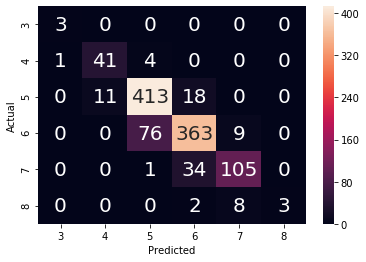

In [20]:
data = {'y_Actual': y_test, 'y_Predicted': prediction}

cd = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(cd['y_Actual'], cd['y_Predicted'], rownames=['Actual'], colnames=['Predicted'] )
akws = {"ha": 'center',"va": 'center',"fontsize":20}
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws=akws)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()